[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/andreaaraldo/machine-learning-for-networks/blob/master/01.introduction/a.exploration.ipynb)


We use a the dataset of QoE prediction from [Requet dataset](https://github.com/Wimnet/RequetDataSet): Requet: Real-Time QoE Detection for Encrypted YouTube Traffic (preprocessed by me).




Figures from [1]:

![alt text](https://raw.githubusercontent.com/andreaaraldo/machine-learning-for-networks/master/01.introduction/img/sys-diagram.png)


![alt text](https://raw.githubusercontent.com/andreaaraldo/machine-learning-for-networks/master/01.introduction/img/experimental.png)


Load libraries


In [ ]:
import pandas as pd # For dataframes (tables)
import numpy as np # For numerical operations
import math 
import matplotlib.pyplot as plt # For plots
import os # To import external python files
import sys# To import external python files

from pandas.plotting import scatter_matrix

# This a comment


Load the dataset previously preprocessed.



In [ ]:
! wget https://raw.githubusercontent.com/andreaaraldo/machine-learning-for-networks/master/processed_datasets/requet/df.A_1.csv

--2020-11-16 18:36:36--  https://raw.githubusercontent.com/andreaaraldo/machine-learning-for-networks/master/processed_datasets/requet/df.A_1.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1981459 (1.9M) [text/plain]
Saving to: ‘df.A_1.csv’

df.A_1.csv          100%[===================>]   1.89M  --.-KB/s    in 0.1s    

2020-11-16 18:36:37 (17.5 MB/s) - ‘df.A_1.csv’ saved [1981459/1981459]



In [ ]:
! ls

df.A_1.csv  sample_data


In [ ]:
df = pd.read_csv('df.A_1.csv')

In [ ]:
df.head(n=11)

,RelativeTime,PacketsSent,PacketsReceived,BytesSent,BytesReceived,IPSrc0,IPDst0,Protocol0,PacketsSent0,PacketsReceived0,BytesSent0,BytesReceived0,IPSrc1,IPDst1,Protocol1,PacketsSent1,PacketsReceived1,BytesSent1,BytesReceived1,IPSrc2,IPDst2,Protocol2,PacketsSent2,PacketsReceived2,BytesSent2,BytesReceived2,IPSrc3,IPDst3,Protocol3,PacketsSent3,PacketsReceived3,BytesSent3,BytesReceived3,IPSrc4,IPDst4,Protocol4,PacketsSent4,PacketsReceived4,BytesSent4,BytesReceived4,...,IPDst22,Protocol22,PacketsSent22,PacketsReceived22,BytesSent22,BytesReceived22,IPSrc23,IPDst23,Protocol23,PacketsSent23,PacketsReceived23,BytesSent23,BytesReceived23,IPSrc24,IPDst24,Protocol24,PacketsSent24,PacketsReceived24,BytesSent24,BytesReceived24,IPSrc25,IPDst25,Protocol25,PacketsSent25,PacketsReceived25,BytesSent25,BytesReceived25,Buffering,Paused,Playing,CollectData,EpochTime,StartTime,PlaybackProgress,Length,BufferHealth,BufferProgress,BufferValid,KBytesReceived,label
0,0.4,14,14,5351,12894,192.168.1.190,173.194.55.23,0,0,0,0,0,192.168.1.190,172.217.11.3,0,0,0,0,0,192.168.1.190,172.217.6.225,0,0,0,0,0,192.168.1.190,172.217.11.35,QUIC,4,3,1633,1537,192.168.1.190,172.217.12.174,QUIC,7,8,717,11136,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0.0.0,0,1,0,217,0,0,0,0,0,0,1520324862555,0.000,861.841,0.000,0.000000,-1,12.894,NoQualityInfo
1,6.1,29,57,2372,79344,192.168.1.190,173.194.55.23,QUIC,29,57,2372,79344,192.168.1.190,172.217.11.3,0,0,0,0,0,192.168.1.190,172.217.6.225,0,0,0,0,0,192.168.1.190,172.217.11.35,0,0,0,0,0,192.168.1.190,172.217.12.174,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0.0.0,0,0,0,0,0,0,0,1,0,1520324868397,1520324862555,0.008,861.841,4.454,0.005177,true,79.344,q480p
2,2.2,18,21,2967,21708,192.168.1.190,74.125.155.199,0,0,0,0,0,192.168.1.190,172.217.11.33,0,0,0,0,0,192.168.1.190,172.217.11.35,0,0,0,0,0,192.168.1.190,172.217.11.14,QUIC,11,13,1049,14525,192.168.1.190,172.217.12.206,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0.0.0,0,0,0,0,0,0,0,0,0,0,1521147316421,0.000,817.841,0.000,0.000000,-1,21.708,NoQualityInfo
3,5.8,7,39,625,52973,192.168.1.190,74.125.155.199,QUIC,4,36,384,50112,192.168.1.190,172.217.11.33,QUIC,2,2,159,1469,192.168.1.190,172.217.11.35,0,0,0,0,0,192.168.1.190,172.217.11.14,0,0,0,0,0,192.168.1.190,172.217.12.206,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0.0.0,0,0,0,0,0,0,0,1,0,1521147321127,1521147316421,0.007,817.841,3.955,0.004844,true,52.973,q360p
4,0.1,18,20,2320,13466,192.168.1.190,173.194.54.236,0,0,0,0,0,192.168.1.190,172.217.11.3,TCP,4,3,666,236,192.168.1.190,172.217.11.1,0,0,0,0,0,192.168.1.190,172.217.10.14,QUIC,1,3,83,2864,192.168.1.190,172.217.10.226,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0.0.0,0,0,0,0,0,0,0,0,0,0,1520279002790,0.000,638.981,0.000,0.000000,-1,13.466,NoQualityInfo
5,1.2,21,23,5619,14835,192.168.1.190,173.194.54.236,0,0,0,0,0,192.168.1.190,172.217.11.3,QUIC,3,3,241,1540,192.168.1.190,172.217.11.1,QUIC,5,6,1710,4385,192.168.1.190,172.217.10.14,QUIC,0,1,0,69,192.168.1.190,172.217.10.226,QUIC,8,7,1948,4453,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0.0.0,0,0,0,0,0,0,0,0,0,0,1520279002790,0.000,638.981,0.000,0.000000,-1,14.835,NoQualityInfo
6,1.5,8,15,637,17127,192.168.1.190,173.194.54.236,0,0,0,0,0,192.168.1.190,172.217.11.3,0,0,0,0,0,192.168.1.190,172.217.11.1,0,0,0,0,0,192.168.1.190,172.217.10.14,QUIC,8,15,637,17127,192.168.1.190,172.217.10.226,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0.0.0,0,0,0,0,0,0,0,0,0,0,1520279002790,0.000,638.981,0.000,0.000000,-1,17.127,NoQualityInfo
7,0.4,32,33,2980,28924,192.168.1.190,74.125.155.201,0,0,0,0,0,192.168.1.190,172.217.11.1,0,0,0,0,0,192.168.1.190,172.217.11.3,TCP,7,7,732,5336,192.168.1.190,216.58.219.206,TCP,13,16,916,15908,192.168.1.190,216.58.217.99,0,0,0,0,0,...,0,0,0,0,0,0,192.168.1.190,0,0,0,0,0,0,192.168.1.190,0,0,0,0,0,0,192.168.1.190,0.0.0.0,0,0,0,0,0,0,0,0,0,0,1516218790859,0.000,623.401,0.000,0.000000,-1,28.924,NoQualityInfo
8,7.3,16,23,1056,34178,192.168.1.190

In [ ]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2232 entries, 0 to 2231
Data columns (total 200 columns):
 #   Column             Dtype  
---  ------             -----  
 0   RelativeTime       float64
 1   PacketsSent        int64  
 2   PacketsReceived    int64  
 3   BytesSent          int64  
 4   BytesReceived      int64  
 5   IPSrc0             object 
 6   IPDst0             object 
 7   Protocol0          object 
 8   PacketsSent0       int64  
 9   PacketsReceived0   int64  
 10  BytesSent0         int64  
 11  BytesReceived0     int64  
 12  IPSrc1             object 
 13  IPDst1             object 
 14  Protocol1          object 
 15  PacketsSent1       int64  
 16  PacketsReceived1   int64  
 17  BytesSent1         int64  
 18  BytesReceived1     int64  
 19  IPSrc2             object 
 20  IPDst2             object 
 21  Protocol2          object 
 22  PacketsSent2       int64  
 23  PacketsReceived2   int64  
 24  BytesSent2         int64  
 25  BytesReceived2     int6

We first check the meaning from the repository [Requet dataset](https://github.com/Wimnet/RequetDataSet).

Check the possbile values that a certain feature can take

In [ ]:
print ("Values of label: ",  df['label'].unique() )
print ("Values of BufferValid: ",  df['BufferValid'].unique() )

Values of label:  ['NoQualityInfo' 'q480p' 'q360p' 'q720p' 'q144p' 'q1080p' 'q240p']
Values of BufferValid:  ['-1' 'true' 'True']


# Basic statistics

How many samples and columns are present in our dataset?

In [ ]:
df.shape

(2232, 200)

In [ ]:
df.describe()

,RelativeTime,PacketsSent,PacketsReceived,BytesSent,BytesReceived,PacketsSent0,PacketsReceived0,BytesSent0,BytesReceived0,PacketsSent1,PacketsReceived1,BytesSent1,BytesReceived1,PacketsSent2,PacketsReceived2,BytesSent2,BytesReceived2,PacketsSent3,PacketsReceived3,BytesSent3,BytesReceived3,PacketsSent4,PacketsReceived4,BytesSent4,BytesReceived4,PacketsSent5,PacketsReceived5,BytesSent5,BytesReceived5,PacketsSent6,PacketsReceived6,BytesSent6,BytesReceived6,PacketsSent7,PacketsReceived7,BytesSent7,BytesReceived7,PacketsSent8,PacketsReceived8,BytesSent8,...,BytesReceived19,PacketsSent20,PacketsReceived20,BytesSent20,BytesReceived20,PacketsSent21,PacketsReceived21,BytesSent21,BytesReceived21,Protocol22,PacketsSent22,PacketsReceived22,BytesSent22,BytesReceived22,Protocol23,PacketsSent23,PacketsReceived23,BytesSent23,BytesReceived23,Protocol24,PacketsSent24,PacketsReceived24,BytesSent24,BytesReceived24,Protocol25,PacketsSent25,PacketsReceived25,BytesSent25,BytesReceived25,Buffering,Paused,Playing,CollectData,EpochTime,StartTime,PlaybackProgress,Length,BufferHealth,BufferProgress,KBytesReceived
count,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,...,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.0,2232.0,2232.0,2232.0,2232.0,2232.0,2232.0,2232.0,2232.0,2232.0,2232.0,2232.0,2232.0,2232.0,2232.0,2232.0,2232.000000,2232.000000,2232.000000,2232.000000,2232.0,2232.0,2232.000000,2232.0,2.232000e+03,2.232000e+03,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000
mean,157.622088,13.646057,46.354391,2588.756720,60273.047939,7.193548,35.568996,690.307348,49429.816756,1.629032,2.700717,260.761649,3481.848118,0.496864,0.712366,116.952957,737.942204,0.784946,1.173835,176.732079,1182.912634,0.655914,0.868280,182.621416,830.406362,0.371416,0.417115,135.631720,357.833333,0.366935,0.387993,155.231631,317.561828,0.237007,0.247760,87.448029,201.527778,0.254032,0.266129,101.707437,...,3.349014,0.008961,0.009409,0.995072,5.538082,0.003584,0.003584,0.758961,2.008065,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.264337,2.497312,87.672939,2242.987455,0.0,0.0,0.130824,0.0,1.989167e+11,1.521015e+12,0.001145,700.398722,0.560771,0.000773,60.273048
std,200.587375,11.292302,37.291579,3608.402052,53043.391908,9.867758,40.948609,883.071456,56944.059103,6.185278,10.908529,811.636020,15188.776782,1.988760,2.962135,515.089174,3385.300810,2.413429,3.781845,637.801431,4204.456103,2.255701,2.966968,748.443522,3009.886143,1.756731,1.837000,640.374916,1557.399483,1.632876,1.644299,707.931630,1361.241122,1.320395,1.216941,490.493883,905.800145,1.435755,1.395375,520.737087,...,105.117746,0.215721,0.220836,25.078907,137.537195,0.123398,0.123398,26.116763,90.773013,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.099293,16.785033,798.269997,19054.786889,0.0,0.0,0.337284,0.0,5.128357e+11,1.034676e+09,0.004934,139.896823,1.685021,0.002349,53.043392
min,0.100000,0.000000,7.000000,0.000000,10003.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000e+00,1.516208e+12,0.000000

If we want to see all columns:

In [ ]:
# Trick from https://stackoverflow.com/q/24524104/2110769
with pd.option_context('display.max_columns', df.shape[1]):
    print(df.describe(include='all'))

        RelativeTime  PacketsSent  PacketsReceived     BytesSent  \
count    2232.000000  2232.000000      2232.000000   2232.000000   
unique           NaN          NaN              NaN           NaN   
top              NaN          NaN              NaN           NaN   
freq             NaN          NaN              NaN           NaN   
mean      157.622088    13.646057        46.354391   2588.756720   
std       200.587375    11.292302        37.291579   3608.402052   
min         0.100000     0.000000         7.000000      0.000000   
25%         1.500000     7.000000        20.000000    672.000000   
50%        40.050000    12.000000        33.000000   1242.500000   
75%       321.525000    17.000000        63.000000   2530.750000   
max       599.100000   153.000000       356.000000  30067.000000   

        BytesReceived          IPSrc0           IPDst0 Protocol0  \
count     2232.000000            2232             2229      2232   
unique            NaN               5          

## 1st and 2nd order statistics

If we have $m$ samples
Statistics of the $j$-th feature:

|<span> | | |
|---------------|-------|:--|
| Mean| $
    \mu_j \triangleq $ | $    \frac{1}{m} \sum_{i=1}^m
        x_j^{(i)}
$ |
|Variance| $
    \text{Var}_j \triangleq$  |    $\frac{1}{m-1} \sum_{i=1}^m
        \left( x_j^{(i)} - \mu_j \right)^2
$|
|Standard deviation|$
\sigma_j \triangleq $ | $ \sqrt{\text{Var}(x_j)}
$|


Note: Why $m-1$? See [Wikipedia](https://en.wikipedia.org/wiki/Variance#Sample_variance) (Not important to retain).



## Boxplot

It represents minimum, percentiles (25%,50%,75%) and maximum.

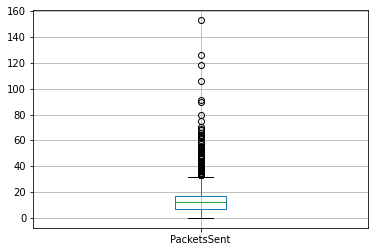

In [ ]:
df.boxplot(column=['PacketsSent'])

#### Percentiles

How does are 25%, 50% (median) and 75% percentiles computed?

In [ ]:
X = df['PacketsSent'].values
X

array([14, 29, 18, ..., 10, 10, 48])

Order the values

In [ ]:
X_sorted = np.sort(X)
X_sorted

array([  0,   0,   0, ..., 118, 126, 153])

Visit the elements and stop when you visited 25% 

In [ ]:
K = X_sorted.size
stop = K/100 * 25
print ('stop=',stop)
stop = math.ceil(stop)
print ('stop=',stop)
print('The 25% percentile is ', X_sorted[stop])

stop= 558.0
stop= 558
The 25% percentile is  7


**Meaning**: 25% of the values are $\le$ 7.

#### Outliers

First compute the Inter-Quartile range (range of the box):
    $$ \begin{align}
    \text{IQR} \triangleq 75p - 25p
    \end{align} $$
    

Upper __whisker__ : $\min(75p + 1.5 \cdot \text{IQR}, \text{max_value} )$

Lower __whisker__ : $\max(25p - 1.5 \cdot \text{IQR}, \text{min_value} )$

All points outside are considered **outliers**

We can print the box plots of many columns

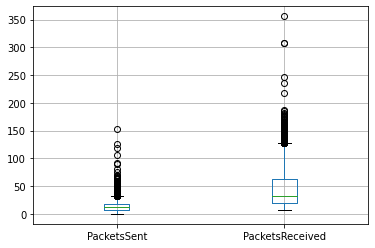

In [ ]:
df.boxplot(column=['PacketsSent', 'PacketsReceived'])

We can print boxplots for different values of a column

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f75375d1588>,
      dtype=object)

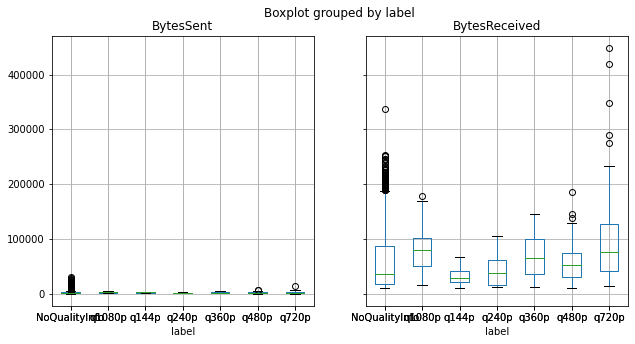

In [ ]:
df.boxplot(column=['BytesSent', 'BytesReceived'], by="label", figsize=(10,5))

## Histogram 

We can plot the histogram of all the features

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f753745f860>,
      dtype=object)

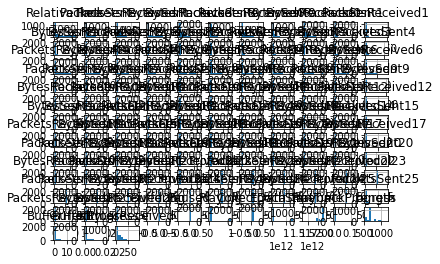

In [ ]:
df.hist()

If features are too many, we need to select some

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f753453c518>,
      dtype=object)

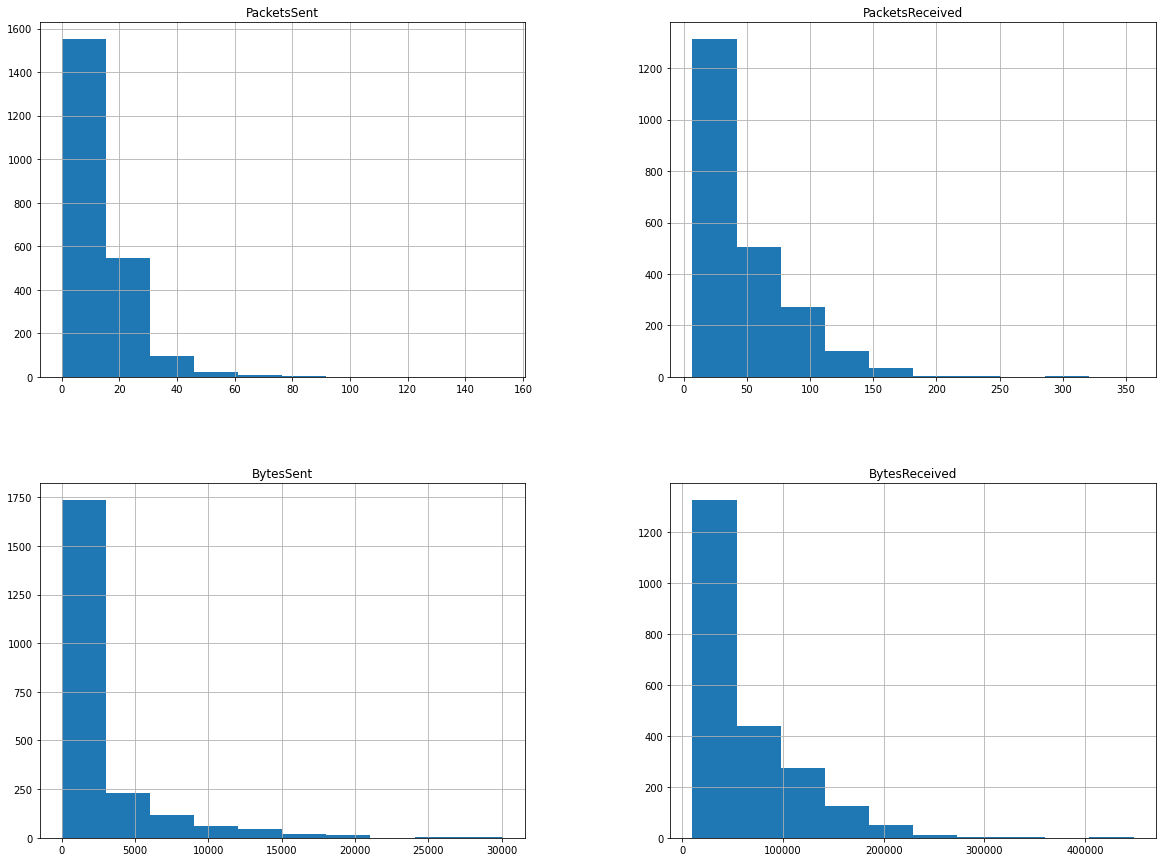

In [ ]:
df[['PacketsSent','PacketsReceived','BytesSent','BytesReceived']].hist(figsize=(20,15))

Each column counts the number of samples in the bin.

Histograms are discretized versions of probability density functions.

#### Binning

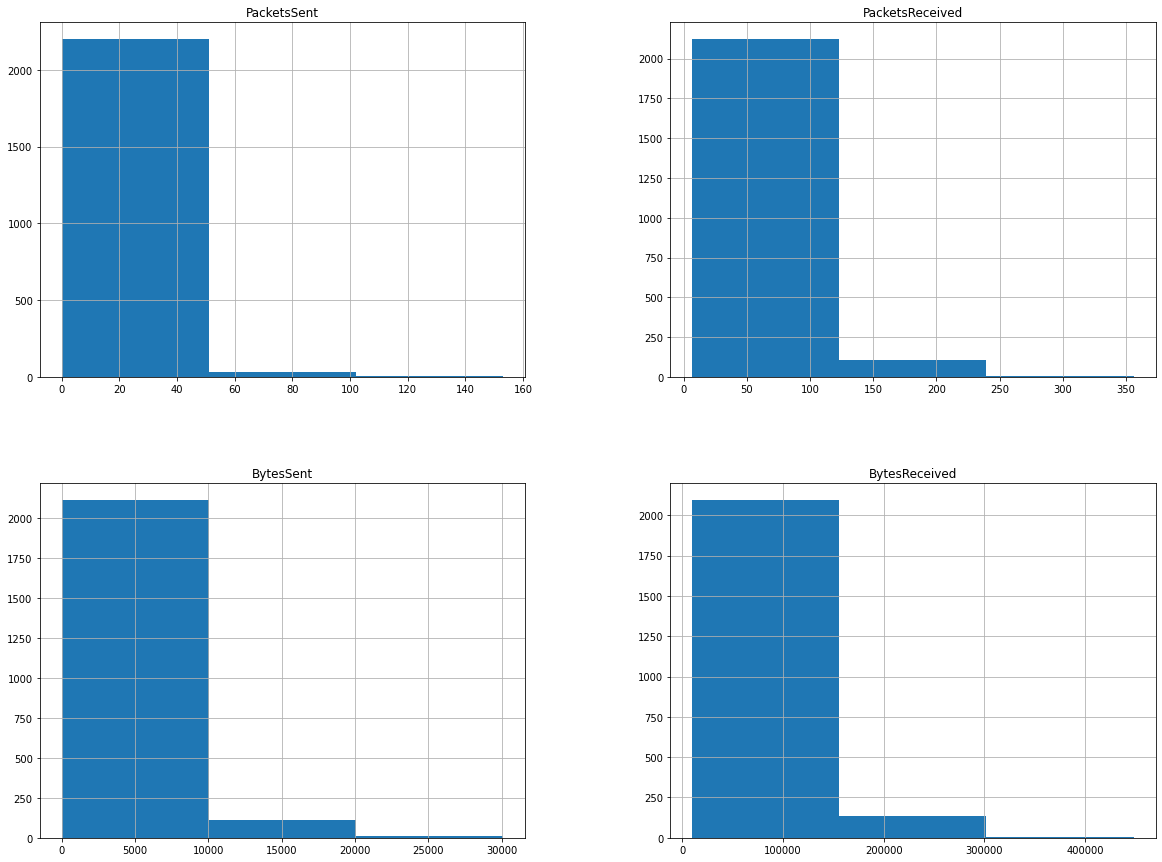

In [ ]:
df[['PacketsSent','PacketsReceived','BytesSent','BytesReceived']].hist(bins=3, figsize=(20,15))
plt.show()

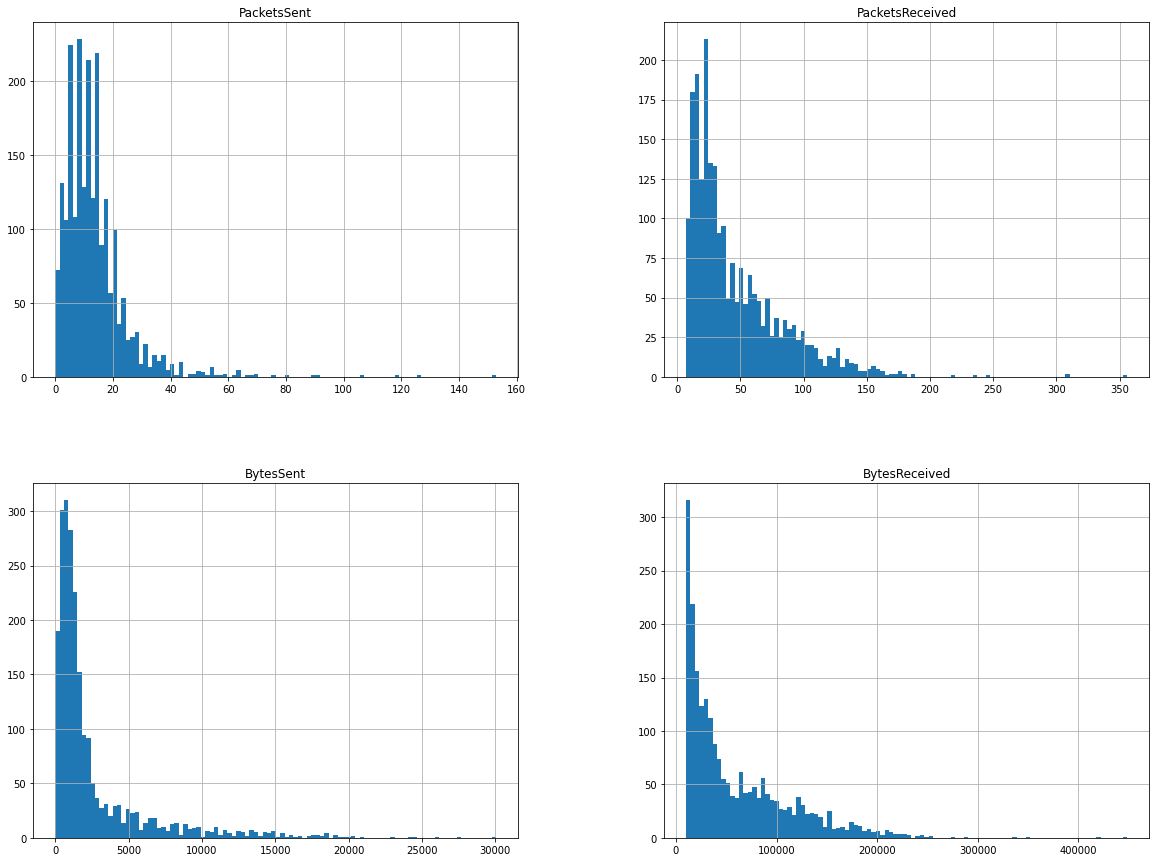

In [ ]:
df[['PacketsSent','PacketsReceived','BytesSent','BytesReceived']].hist(bins=100, figsize=(20,15))
plt.show()

How many bins?

If too few the density of the feature is badly approximated (note that with 3 bins we miss the 3 peaks).

If too many, each bin risk to have only 1 or few samples. 

**Rule of thumb**: the more samples, the more bins, since each bin collects a sufficient number of points. Trial and error.

#### Group by
How does the distribution of a feature changes with the quality?

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f753259fb70>,
      dtype=object)

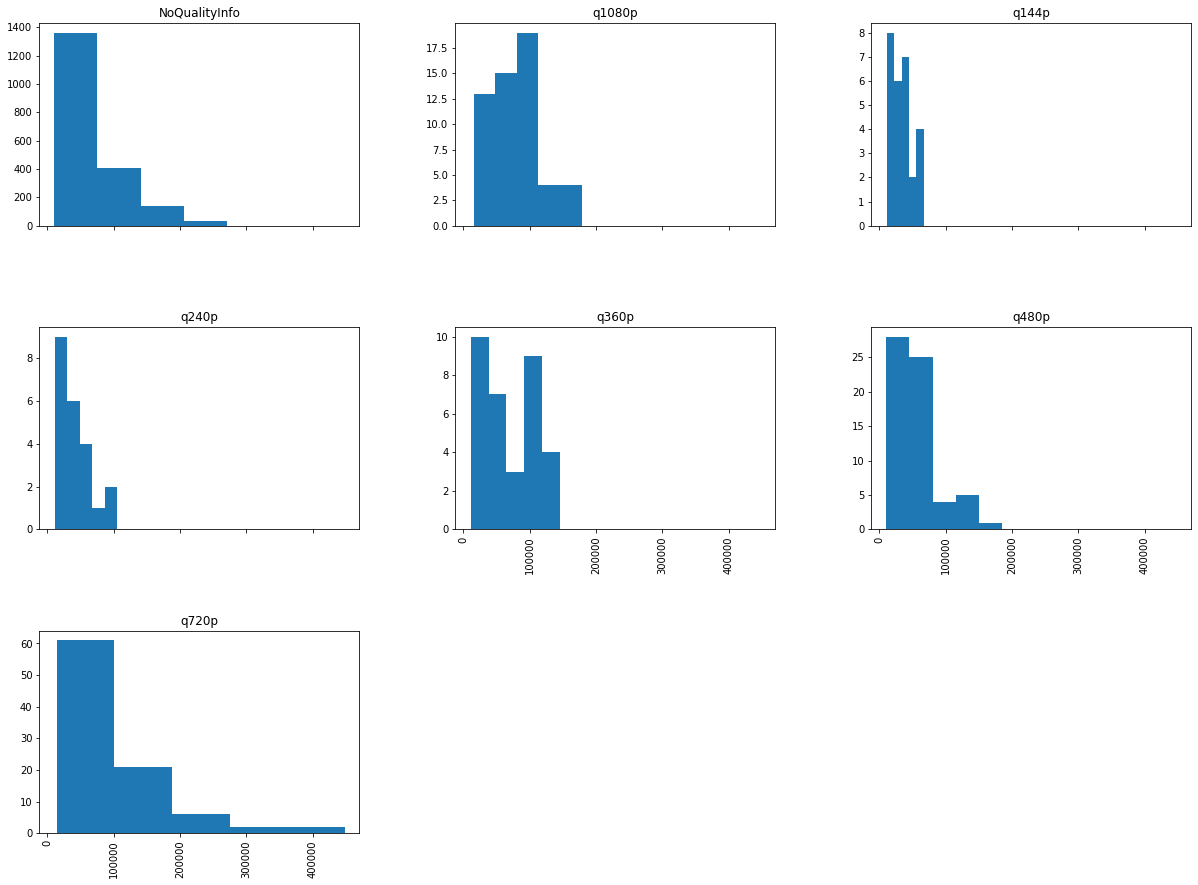

In [ ]:
# sharex imposes all the plots to have the same x range 
# (otherwise visual comparison is different).
df[['BytesReceived', 'label']].hist(figsize=(20,15), by='label', 
                                    sharex=True, bins=5)

As expected, the higher the quality, the more ```ReceivedBytes``` concentrate toward higher values. However, we also see that we have not so many samples and we cannot trust the histogram too much.

**Useful for classification**

We can build a simple classifier: ```if BytesReceived >= threshold ==> 720p```

# Correlations

How do feature relate each other?

Use `scatter_matrix`. If the dataset is big, it would take too long. Let just selects few columns. For instance, the overall metrics (not the connection-wise metrics)

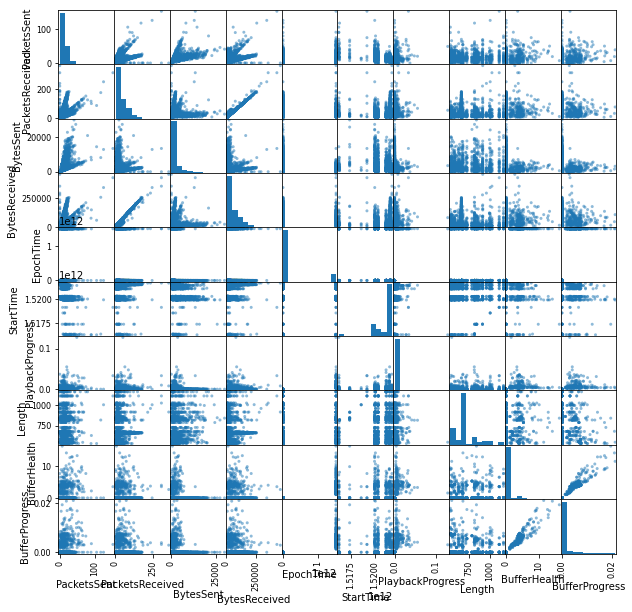

In [ ]:
# We first define a function to change the
# rotation of the text in the plot
   

# The following method takes too long
#     sm = scatter_matrix(df)


# Let us just consider some features
columns_to_plot = ['PacketsSent','PacketsReceived',
                       'BytesSent', 'BytesReceived',
                        'EpochTime', 
                        'StartTime', 'PlaybackProgress',
                       'Length', 'BufferHealth', 'BufferProgress',
                       'BufferValid', 'label']
sm = scatter_matrix(df[columns_to_plot],
                   figsize=(10,10))

plt.show()

If we want to rotate labels, I prepared a function in the course library `visualization`

In [ ]:
! wget https://raw.githubusercontent.com/andreaaraldo/machine-learning-for-networks/master/course_library/visualization.py
import visualization

--2020-11-16 18:50:05--  https://raw.githubusercontent.com/andreaaraldo/machine-learning-for-networks/master/course_library/visualization.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13008 (13K) [text/plain]
Saving to: ‘visualization.py’

visualization.py    100%[===================>]  12.70K  --.-KB/s    in 0s      

2020-11-16 18:50:06 (86.0 MB/s) - ‘visualization.py’ saved [13008/13008]



Let's see what is inside the module I prepared

In [ ]:
help(visualization)

Help on module visualization:

NAME
    visualization

FUNCTIONS
    evaluate_anomaly_detector(y_train, anomaly_scores, threshold_selected=None)
        Evaluates the results from anomaly detection
    
    false_positive_rate(y_true, y_pred)
    
    plot_conf_mat(y_true, y_pred, class_names, normalize=True, title=None, cmap=<matplotlib.colors.ListedColormap object at 0x7f753b82de80>, text=True, width=8, height=8)
        This function prints and plots the confusion matrix.
        In case of errors, you may need to do 
                        class_names = np.array(class_names)
        before calling this function.
        
        
        Parameters:
        --------------------------
        target: The array of the true categories. It contains as many values 
                        as the number of samples. Each value is an integer number 
                        corresponding to a certain category. This array represents 
                        the true category of each sample.

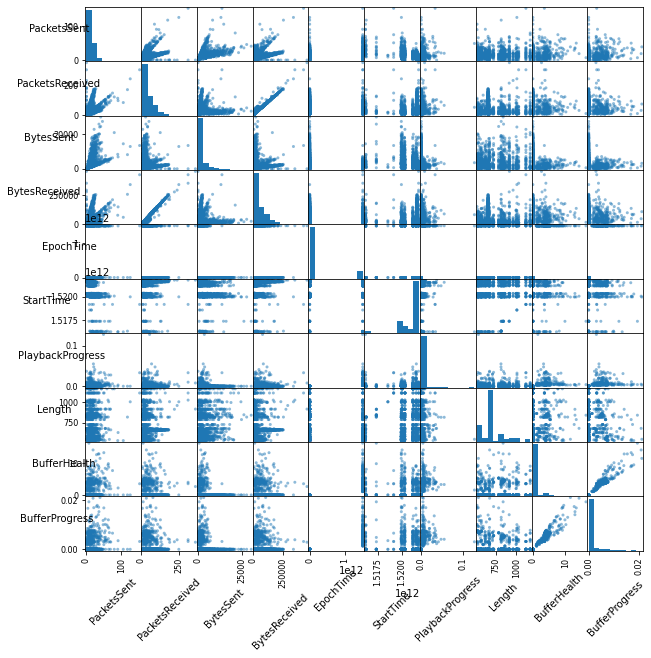

In [ ]:
sm = scatter_matrix(df[columns_to_plot],
                   figsize=(10,10))
visualization.rotate_labels(sm)
plt.show()

Trivial correlations:
* PacketsSent vs. BytesSent
* PacketsReceived vs. BytesReceived
* BufferHealth vs. BufferProgress

Interesting correlations:
* PacketsReceived vs. PacketsSent
*  BufferHealth and BufferProgress are linearly dependent.
    * While we reproduce the video, our ahead-buffer fills more and more

* **BufferProgress**: (fraction of video downloaded into the browser buffer)
* **BufferHealth**: (how many "future seconds" we already have in the buffer)



Unfortunately, `label` is not plotted, since it is not numeric. Let us transform it in numerical form.



In [ ]:
# Let us write our replacing function
def replace_function(label_text):
    if label_text=='q1080p':
        return 1080
    elif label_text=='q720p':
        return 720
    elif label_text=='q480p':
        return 480
    elif label_text=='q360p':
        return 360
    elif label_text=='q240p':
        return 240
    elif label_text=='q144p':
        return 144
    else :
        return 0

# Let us apply it, line by line
label_numeric = df['label'].apply(replace_function)

# Let us add this column to our dataframe
df['label_num'] = label_numeric

Let's plot the scatter_matrix again

In [ ]:
columns_to_plot.append('label_num')

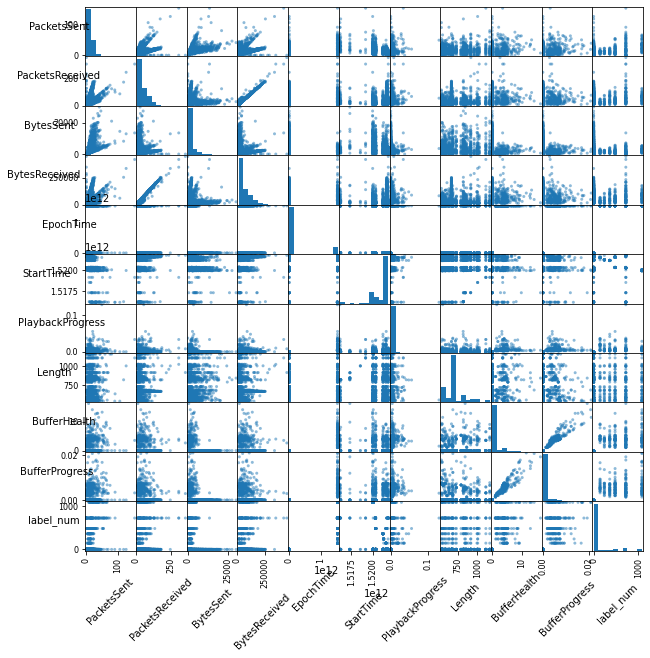

In [ ]:
sm = scatter_matrix(df[columns_to_plot],
                   figsize=(10,10))
visualization.rotate_labels(sm)
plt.show()

Note that `label_num=0` for all the samples without quality determined. This is arbitrary and may lead to wrong interpretation. Let us remove those samples and plot again the scatter matrix

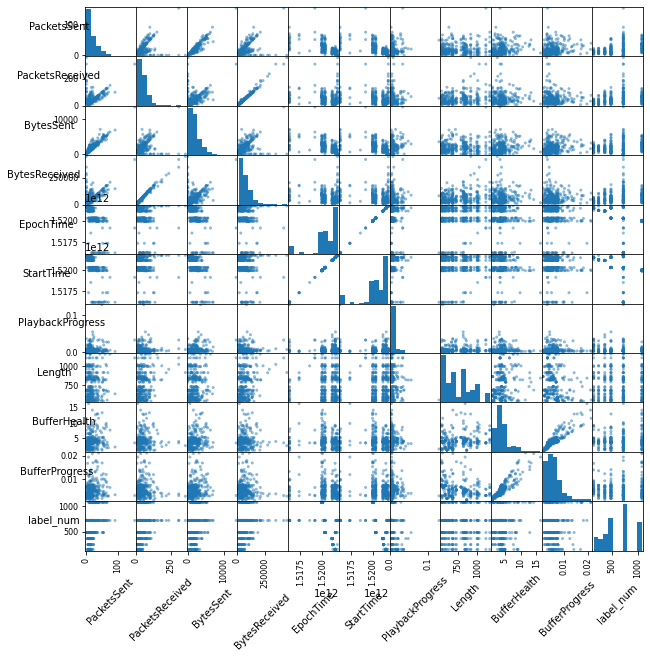

In [ ]:
df_cleaned = df[ df['label_num']!= 0 ].copy()

sm = scatter_matrix(df_cleaned[columns_to_plot],
                   figsize=(10,10))
visualization.rotate_labels(sm)

plt.show()

We see that, the more the quality, the more the bytes sent and received.

## Pearson's correlation

It is a way to mathematically express correlation between two features $j,j'$. For each sample, we compute:
    \begin{align}
    \left( x_j^{(i)} - \mu_j \right) \cdot \left( x_{j'}^{(i)} - \mu_{j'} \right)
    \end{align} 
    
Averaging across all samples, we obtain the **covariance between features** $j,j'$ ([wikipedia](https://en.wikipedia.org/wiki/Covariance#Calculating_the_sample_covariance))
        \begin{align}
        \text{Cov}(j,j') = 
    \frac{1}{m-1}\sum_{i=1}^m \left( x_j^{(i)} - \mu_j \right) \cdot \left( x_{j'}^{(i)} - \mu_{j'} \right)
    \end{align}


We divide by the standard deviation to normalize, and we obtain the **Person's correlation coefficient**
    \begin{align}
    \rho_{j,j'} = \frac{\text{Cov}(j,j')}{\sigma_j\cdot \sigma_{j'}}
    \end{align}

It can be shown that
    $$ -1 \le \rho_{j,j'} \le 1
    $$


Examples of different values of Pearson correlation (in the picture it is indicated as $r$ instead of $\rho$), between $x$ and $y$ values. Note that when $\rho=1$ or $\rho=-1$, there is linear dependence between $x$ and $y$. We can say that Pearson's correlation measures how much much there is linear dependence between features.

<img src=https://raw.githubusercontent.com/andreaaraldo/machine-learning-for-networks/master/01.introduction/img/persons.png width=600>

(picture from [futurelearn](https://www.futurelearn.com/info/courses/data-analytics-for-business-manipulating-and-interpreting-your-data/0/steps/177516)).

* Based on the plot above, what do you expect $\rho_{j,j'}$ to be between `PacketsReceived` and `PacketsSent`?

In [ ]:
corrmatrix = df_cleaned.corr()
corrmatrix

,RelativeTime,PacketsSent,PacketsReceived,BytesSent,BytesReceived,PacketsSent0,PacketsReceived0,BytesSent0,BytesReceived0,PacketsSent1,PacketsReceived1,BytesSent1,BytesReceived1,PacketsSent2,PacketsReceived2,BytesSent2,BytesReceived2,PacketsSent3,PacketsReceived3,BytesSent3,BytesReceived3,PacketsSent4,PacketsReceived4,BytesSent4,BytesReceived4,PacketsSent5,PacketsReceived5,BytesSent5,BytesReceived5,PacketsSent6,PacketsReceived6,BytesSent6,BytesReceived6,PacketsSent7,PacketsReceived7,BytesSent7,BytesReceived7,PacketsSent8,PacketsReceived8,BytesSent8,...,PacketsSent20,PacketsReceived20,BytesSent20,BytesReceived20,PacketsSent21,PacketsReceived21,BytesSent21,BytesReceived21,Protocol22,PacketsSent22,PacketsReceived22,BytesSent22,BytesReceived22,Protocol23,PacketsSent23,PacketsReceived23,BytesSent23,BytesReceived23,Protocol24,PacketsSent24,PacketsReceived24,BytesSent24,BytesReceived24,Protocol25,PacketsSent25,PacketsReceived25,BytesSent25,BytesReceived25,Buffering,Paused,Playing,CollectData,EpochTime,StartTime,PlaybackProgress,Length,BufferHealth,BufferProgress,KBytesReceived,label_num
RelativeTime,1.000000,-0.020187,-0.112497,0.045714,-0.109761,-0.018677,-0.046986,-0.006109,-0.048810,0.009470,0.010266,0.024404,0.009384,-0.027950,-0.033186,-0.034715,-0.033227,-0.034376,-0.034870,-0.019191,-0.029030,-0.036245,-0.027444,-0.038609,-0.023126,0.273866,-0.002314,0.603364,-0.014617,0.024312,0.000081,-0.008508,-0.010075,0.374609,0.272332,0.093813,0.021010,-0.015002,-0.018047,-0.017566,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.047293,-0.078513,-0.047203,-0.075127,NaN,NaN,NaN,NaN,-0.034971,-0.034980,0.019315,-0.085339,0.119733,0.166241,-0.109761,0.076222
PacketsSent,-0.020187,1.000000,0.384305,0.934323,0.451438,0.911828,0.732565,0.886404,0.737804,0.162178,0.127915,0.150298,0.122092,0.068699,0.029784,0.051492,0.019302,-0.033840,-0.023418,0.000541,-0.046710,0.011856,0.010596,0.001768,0.005650,0.005801,-0.057715,-0.008259,-0.027429,0.029245,0.063432,0.040756,0.011741,-0.006572,-0.002300,0.017543,-0.040341,-0.021403,-0.013673,-0.020373,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.149636,-0.255395,0.147915,-0.251637,NaN,NaN,NaN,NaN,-0.602346,-0.602345,0.132974,0.091998,0.149108,0.104490,0.451438,0.383685
PacketsReceived,-0.112497,0.384305,1.000000,0.322786,0.991908,0.408053,0.478983,0.402251,0.478340,0.002959,0.017745,-0.008996,0.021185,-0.054452,-0.076735,-0.063847,-0.082428,-0.135056,-0.101336,-0.109166,-0.097651,-0.081209,-0.051162,-0.102995,-0.040609,-0.069375,-0.075332,-0.061748,-0.047326,-0.056275,-0.022846,-0.044254,-0.033051,-0.017680,-0.005525,0.006837,-0.018311,-0.051696,-0.043714,-0.049016,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.056798,0.690489,0.057275,0.692133,NaN,NaN,NaN,NaN,-0.065924,-0.065923,0.038637,0.267044,0.001752,-0.090167,0.991908,0.251526
BytesSent,0.045714,0.934323,0.322786,1.000000,0.380027,0.818403,0.686676,0.844003,0.688929,0.145494,0.107992,0.153156,0.099145,0.103673,0.067779,0.126079,0.055303,0.029663,-0.009812,0.142672,-0.053401,0.118318,0.059474,0.180373,0.021010,0.114429,-0.012598,0.117272,-0.027612,0.072764,0.070341,0.106350,0.020916,0.069300,0.077084,0.083224,-0.037862,0.066151,0.069890,0.071222,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.206924,-0.289026,0.206123,-0.285584,NaN,NaN,NaN,NaN,-0.510859,-0.510859,0.232850,0.090613,0.161418,0.117130,0.380027,0.225394
BytesReceived,-0.109761,0.451438,0.991908,0.380027,1.000000,0.481893,0.561591,0.474996,0.561818,-0.000413,0.020791,-0.014631,0.026204,-0.065690,-0.087776,-0.075526,-0.092957,-0.142717,-0.108807,-0.115250,-0.102474,-0.095557,-0.060736,-0.120371,-0.044441,-0.073451,-0.081005,-0.065915,-0.049317,-0.054933,-0.020145,-0.043070,-0.032695,-0.020145,-0.009246,0.004208,-0.018433,-0.066360,-0.058572,-0.063471,...,NaN,NaN,NaN,NaN,Na

In [ ]:
corrmatrix = corrmatrix.round(2)
corrmatrix

,RelativeTime,PacketsSent,PacketsReceived,BytesSent,BytesReceived,PacketsSent0,PacketsReceived0,BytesSent0,BytesReceived0,PacketsSent1,PacketsReceived1,BytesSent1,BytesReceived1,PacketsSent2,PacketsReceived2,BytesSent2,BytesReceived2,PacketsSent3,PacketsReceived3,BytesSent3,BytesReceived3,PacketsSent4,PacketsReceived4,BytesSent4,BytesReceived4,PacketsSent5,PacketsReceived5,BytesSent5,BytesReceived5,PacketsSent6,PacketsReceived6,BytesSent6,BytesReceived6,PacketsSent7,PacketsReceived7,BytesSent7,BytesReceived7,PacketsSent8,PacketsReceived8,BytesSent8,...,PacketsSent20,PacketsReceived20,BytesSent20,BytesReceived20,PacketsSent21,PacketsReceived21,BytesSent21,BytesReceived21,Protocol22,PacketsSent22,PacketsReceived22,BytesSent22,BytesReceived22,Protocol23,PacketsSent23,PacketsReceived23,BytesSent23,BytesReceived23,Protocol24,PacketsSent24,PacketsReceived24,BytesSent24,BytesReceived24,Protocol25,PacketsSent25,PacketsReceived25,BytesSent25,BytesReceived25,Buffering,Paused,Playing,CollectData,EpochTime,StartTime,PlaybackProgress,Length,BufferHealth,BufferProgress,KBytesReceived,label_num
RelativeTime,1.00,-0.02,-0.11,0.05,-0.11,-0.02,-0.05,-0.01,-0.05,0.01,0.01,0.02,0.01,-0.03,-0.03,-0.03,-0.03,-0.03,-0.03,-0.02,-0.03,-0.04,-0.03,-0.04,-0.02,0.27,-0.00,0.60,-0.01,0.02,0.00,-0.01,-0.01,0.37,0.27,0.09,0.02,-0.02,-0.02,-0.02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.05,-0.08,-0.05,-0.08,NaN,NaN,NaN,NaN,-0.03,-0.03,0.02,-0.09,0.12,0.17,-0.11,0.08
PacketsSent,-0.02,1.00,0.38,0.93,0.45,0.91,0.73,0.89,0.74,0.16,0.13,0.15,0.12,0.07,0.03,0.05,0.02,-0.03,-0.02,0.00,-0.05,0.01,0.01,0.00,0.01,0.01,-0.06,-0.01,-0.03,0.03,0.06,0.04,0.01,-0.01,-0.00,0.02,-0.04,-0.02,-0.01,-0.02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.15,-0.26,0.15,-0.25,NaN,NaN,NaN,NaN,-0.60,-0.60,0.13,0.09,0.15,0.10,0.45,0.38
PacketsReceived,-0.11,0.38,1.00,0.32,0.99,0.41,0.48,0.40,0.48,0.00,0.02,-0.01,0.02,-0.05,-0.08,-0.06,-0.08,-0.14,-0.10,-0.11,-0.10,-0.08,-0.05,-0.10,-0.04,-0.07,-0.08,-0.06,-0.05,-0.06,-0.02,-0.04,-0.03,-0.02,-0.01,0.01,-0.02,-0.05,-0.04,-0.05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,0.69,0.06,0.69,NaN,NaN,NaN,NaN,-0.07,-0.07,0.04,0.27,0.00,-0.09,0.99,0.25
BytesSent,0.05,0.93,0.32,1.00,0.38,0.82,0.69,0.84,0.69,0.15,0.11,0.15,0.10,0.10,0.07,0.13,0.06,0.03,-0.01,0.14,-0.05,0.12,0.06,0.18,0.02,0.11,-0.01,0.12,-0.03,0.07,0.07,0.11,0.02,0.07,0.08,0.08,-0.04,0.07,0.07,0.07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.21,-0.29,0.21,-0.29,NaN,NaN,NaN,NaN,-0.51,-0.51,0.23,0.09,0.16,0.12,0.38,0.23
BytesReceived,-0.11,0.45,0.99,0.38,1.00,0.48,0.56,0.47,0.56,-0.00,0.02,-0.01,0.03,-0.07,-0.09,-0.08,-0.09,-0.14,-0.11,-0.12,-0.10,-0.10,-0.06,-0.12,-0.04,-0.07,-0.08,-0.07,-0.05,-0.05,-0.02,-0.04,-0.03,-0.02,-0.01,0.00,-0.02,-0.07,-0.06,-0.06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.05,0.61,0.05,0.62,NaN,NaN,NaN,NaN,-0.12,-0.12,0.04,0.26,0.01,-0.08,1.00,0.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Length,-0.09,0.09,0.27,0.09,0.26,0.09,0.10,0.10,0.09,0.00,0.03,-0.01,0.03,0.09,0.06,0.09,0.05,-0.01,0.01,-0.03,0.02,-0.01,-0.01,-0.01,-0.00,-0.01,0.03,-0.04,-0.02,-0.05,-0.08,0.01,-0.05,-0.13,-0.08,-0.10,0.01,-0.07,-0.06,-0.06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.07,0.19,-0.07,0.20,NaN,NaN,NaN,NaN,0.09,0.09,-0.00,1.00,0.17,-0.24,0.26,0.02
BufferHealth,0.12,0.15,0.00,0.16,0.01,0.10,0.06,0.11,0.06,0.19,0.18,0.18,0.17,-0.01,-0.02,0.01,-0.03

Let's print some of the values of the correlation matrix:

In [ ]:
print("PacketsReceived <-> PacketsSent", 
    corrmatrix['PacketsReceived']['PacketsSent'] )

print("label_num <-> BytesReceived", 
    corrmatrix['label_num']['BytesReceived'] )


print("BytesReceived <-> PacketsReceived", 
    corrmatrix['BytesReceived']['PacketsReceived'] )

PacketsReceived <-> PacketsSent 0.38
label_num <-> BytesReceived 0.26
BytesReceived <-> PacketsReceived 0.99


Based on your knowledge on video streaming, can you explain such correlations?


#### Visualization
In the library `visualization`, I prepared a function to easily visualize correlations. We need to import it:

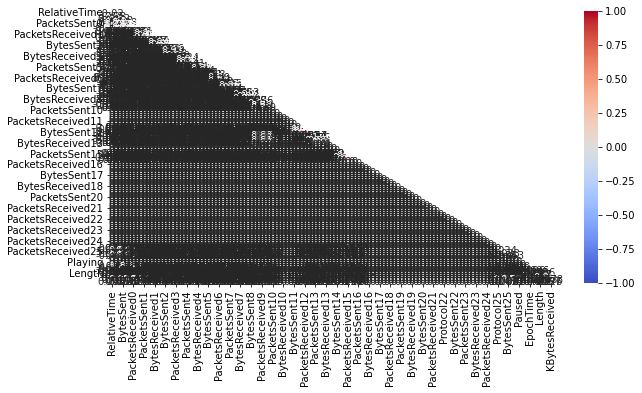

In [ ]:
visualization.plot_corr(df_cleaned, width=10, height=5, 
                        print_value=True)

Better not to write the values

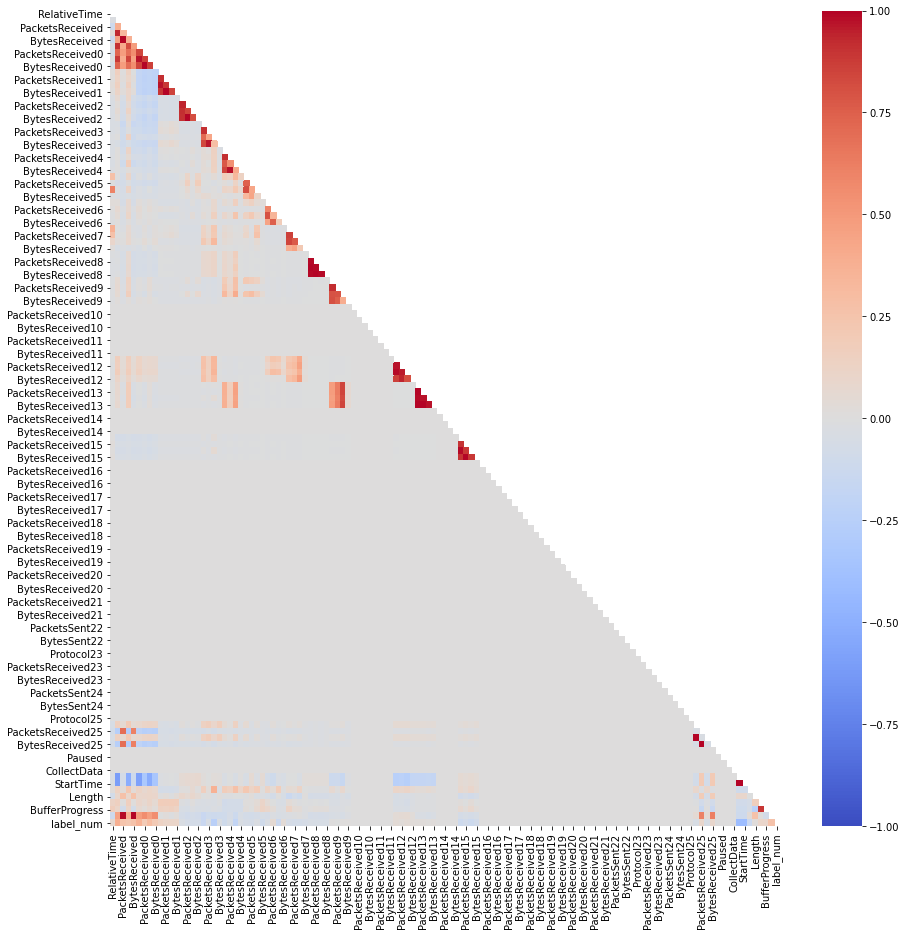

In [ ]:
visualization.plot_corr(df_cleaned, width=15, height=15, 
                        print_value=False)

If we focus on `label_num`, it seems that features starting from `BytesReceived3` up to `Protocol25` dot not have a large correlation with `label_num`. Let's remove them to make our correlation plot clearer.

In [ ]:
# Retrieve the positions of the features we want to remove
indexOfBytesReceived3 = list(df_cleaned.columns).index('BytesReceived3')
indexOfProtocol25 = list(df_cleaned.columns).index('Protocol25')

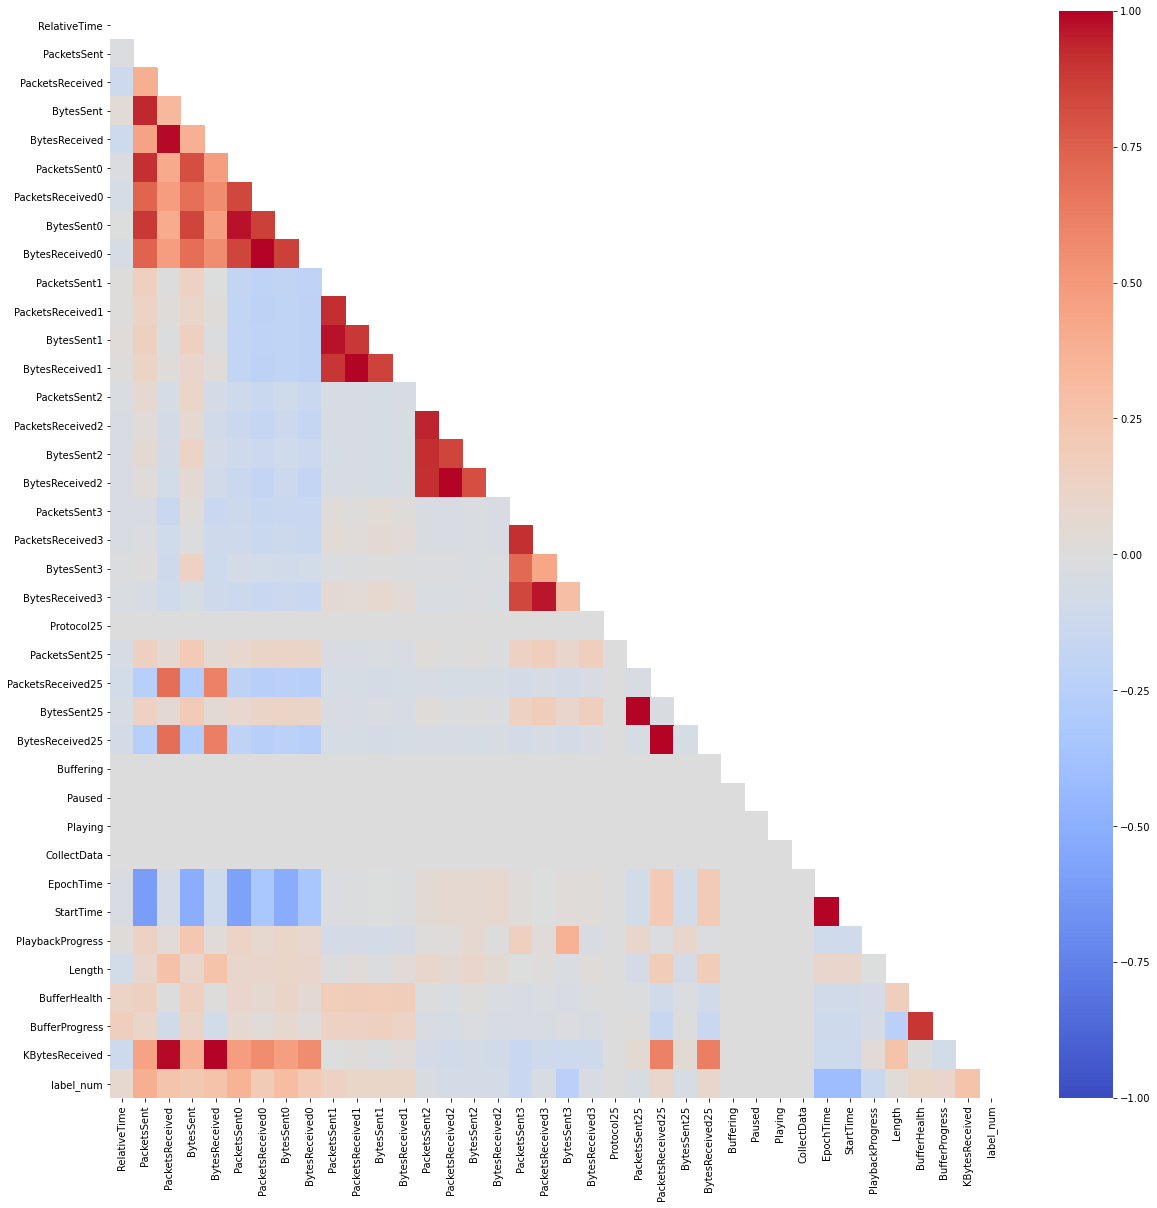

In [ ]:
# We put the feature names we want to keep in the list columns_to_focus.

columns_to_focus = df_cleaned.columns[0:indexOfBytesReceived3+1]
columns_to_focus = columns_to_focus.append(df_cleaned.columns[indexOfProtocol25:])

visualization.plot_corr(df_cleaned[columns_to_focus], width=20, height=20, 
                        print_value=False)

#### Feature importance (based on Person's correlation)

What are the most correlated features to `label_num`?

In [ ]:
# From the course library
! wget https://raw.githubusercontent.com/andreaaraldo/machine-learning-for-networks/master/course_library/feature_engineering.py
import feature_engineering

help(feature_engineering)



--2020-11-16 19:00:23--  https://raw.githubusercontent.com/andreaaraldo/machine-learning-for-networks/master/course_library/feature_engineering.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2206 (2.2K) [text/plain]
Saving to: ‘feature_engineering.py’

feature_engineering 100%[===================>]   2.15K  --.-KB/s    in 0s      

2020-11-16 19:00:24 (21.3 MB/s) - ‘feature_engineering.py’ saved [2206/2206]

Help on module feature_engineering:

NAME
    feature_engineering

FUNCTIONS
    get_features_correlated_to_target(df, target_feature)
        Returns the Pearson's correlation coefficient between the 
        features and the target
        
        Parameters
        ------------
        df_: dataframe
        
        target_feature: string
           

In [ ]:
features_corr = \
        feature_engineering.get_features_correlated_to_target(
                df_cleaned, target_feature='label_num')

features_corr[:12]

label_num          1.00
StartTime         -0.41
EpochTime         -0.41
PacketsSent        0.38
PacketsSent0       0.36
BytesSent0         0.30
BytesReceived      0.26
KBytesReceived     0.26
PacketsReceived    0.25
BytesSent3        -0.23
BytesSent          0.23
BytesReceived0     0.20
Name: label_num, dtype: float64

The most correlated feature to the label_num are `StartTime` and `Epoch time`
* `StartTime`: Unix epoch time in milliseconds of the beginning of the experiment
* `EpochTime`: UNIX epoch time in milliseconds of the most recent YouTube API event in the 100-ms interval.

Why these correlations? Would it be correct to use these features? Would these correlations exist in real world?

<details>
<summary>...
    
__Click__
</summary>

The guy who made the experiment first started with high quality videos and then low quality.
    
Correlations of `label_num` with `StartTime` and `EpochTime` are just due to the way the experiment is conducted.
    
We should **NOT USE** them, as in the real world the videos will not be played in the order of quality.
</details>

Explain the correlation of `label_num` with `BytesReceived` and with `PacketsReceived`

<details>
<summary>  ...
    
**Click**
</summary>
    
    The more the quality, the more bytes we need per second. More bytes need to be transported in more IP packets.
</details>

In [ ]:
features_corr

label_num       1.00
StartTime      -0.41
EpochTime      -0.41
PacketsSent     0.38
PacketsSent0    0.36
                ... 
Protocol25       NaN
Buffering        NaN
Paused           NaN
Playing          NaN
CollectData      NaN
Name: label_num, Length: 125, dtype: float64

Why those Not a Number (NaN)?

Remember that
    $$ \begin{align}
    \rho_{j,j'} = \frac{\text{Cov}(j,j')}{\sigma_j\cdot \sigma_{j'}}
    \end{align} $$

### Limits of Pearson's correlation

Correlation does not capture all types of dependencies. Suppose you have two features as follows:

In [ ]:
invented_df = pd.DataFrame()
invented_df['x'] = np.arange(-10,11,1)
invented_df['y'] = invented_df['x'] * invented_df['x']

invented_df


,x,y
0,-10,100
1,-9,81
2,-8,64
3,-7,49
4,-6,36
5,-5,25
6,-4,16
7,-3,9
8,-2,4
9,-1,1


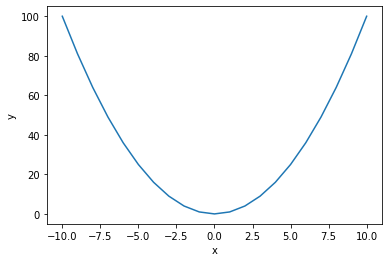

In [ ]:
plt.xlabel("x")
plt.ylabel("y")
plt.plot(invented_df['x'], invented_df['y'] )


Is there dependency between `x` and `y`? What is the correlation?

In [ ]:
invented_df.corr().round(2)

,x,y
x,1.0,-0.0
y,-0.0,1.0


If the Pearson's correlation is zero, it does not mean there is no dependency.

Pearson's coefficient only captures monotonic dependency (if one increases the other increases/decreases).

In our case:
* Before 0 => Negative correlation
* After 0 => Positive correlation

But in general
* 0-correlation

#### Additional details

You can skip them, if not interested.

***Finding more complex correlations***
If Person's correlation cannot capture all the types of depedence between features, how can we capture them?

There are practically two ways: (i) a-priori, i.e., before training any ML model, just by applying statistical tests or exploring data visually and (ii) a-posteriori, i.e., you first train a model and then you observe how it automatically chose the features to use the most.

* A prori:
  * Visually, using the scattermatrix
    * (Recall that if there are too many features, you may pre-filter some just based on your intuition)
  * You first transform one of the two features (see next section) and compute the correlation coefficient again
  * If the two features are categorical, plot the histogram of one, fixing the value of the other, and see how this histogram changes (as we did in the "Group by" section of this notebook).
  * Using statistical tests or more advance statistical measures (outside of the scope of this course) 
    * [Chi-Squared test](https://machinelearningmastery.com/chi-squared-test-for-machine-learning/): this test allows to answer the following question: Is there a dependence between two categorical features? Yes or not?
    * `nlcor` uses heuristics to find non-linear relationships ([available in R](https://towardsdatascience.com/estimating-non-linear-correlation-in-r-62c6571cb1db) ).
    * [Distance Correlation and Maximal Information Coefficient](https://www.freecodecamp.org/news/how-machines-make-predictions-finding-correlations-in-complex-data-dfd9f0d87889/).
* A posteriori:
  * You train a model using several features and then check, a posteriori, their "feature importance", i.e., how much the prediction of the model is impacted by them. We will see them in next lessons (don't worry if you don't fully understand them now):
    * In a linear regression or logistic regression model, after scaling the dataset, the coefficient of each feature is an indication of importance
    * Random forests also return a feature importance value
    * Each method may have its own specific way of expressioning feature importance.
  * [Permutation feature importance](https://scikit-learn.org/stable/modules/permutation_importance.html)


# Transformation

Correlations are sometimes unclear, due to the fact that some features may be **skewed** like the following. 

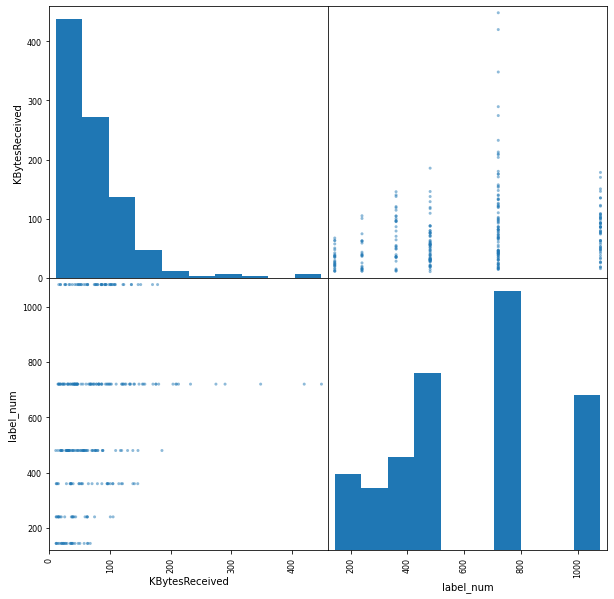

In [ ]:
cols = ['KBytesReceived','label_num']
sm = scatter_matrix(df_cleaned[cols],
                   figsize=(10,10))

There are many samples crowded together around low values of `PacketsSent`. We would like to zoom in into those values to discern them.

In [ ]:
df_cleaned['KBytesReceived_log'] = np.log(df_cleaned['KBytesReceived'])

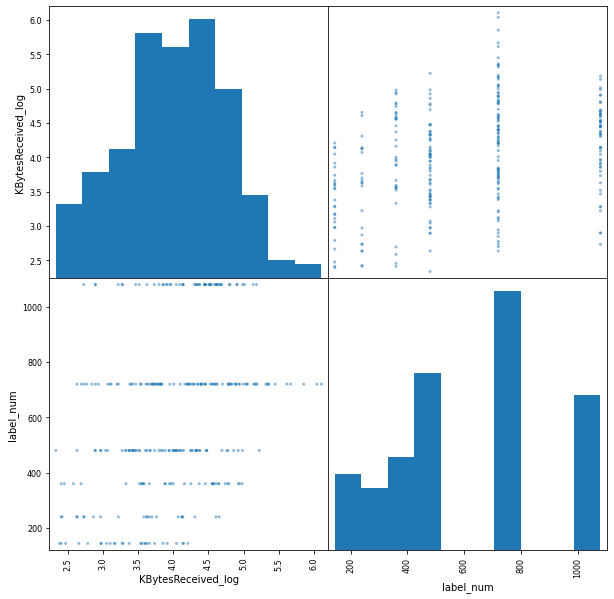

In [ ]:
cols = ['KBytesReceived_log','label_num']
sm = scatter_matrix(df_cleaned[cols],
                   figsize=(10,10))

What changed:
* Values of KBytesReceived are better spread
* Looking at `label_num` vs. `KBytesReceived_log`, the values are less squashed down

This let correlation better emerge:

In [ ]:
corrmatrix = df_cleaned.corr()
print("Original correlation: ", corrmatrix['KBytesReceived']['label_num'],
     "; Correlation after transformation: ",
     corrmatrix['KBytesReceived_log']['label_num'])

Original correlation:  0.26444253489122005 ; Correlation after transformation:  0.3399134831774235


#### Transform multiple features at a time.

Let's check what are the features that would benefit from log-transformation

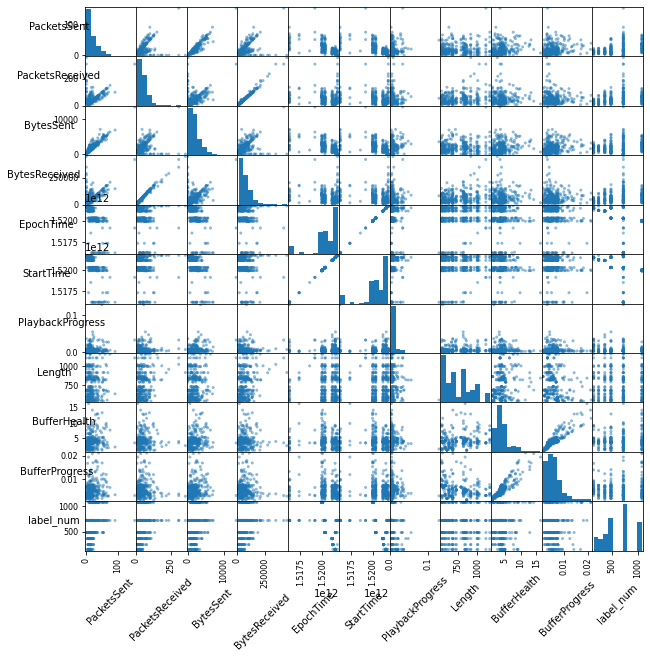

In [ ]:
sm = scatter_matrix(df_cleaned[columns_to_plot],
                   figsize=(10,10))
visualization.rotate_labels(sm)

plt.show()

They are 
`PacketsSent`, `PacketsReceived`, `BytesSent`, `BytesReceived`,`BufferProgress`

In [ ]:
cols_to_transform = ['PacketsSent','PacketsReceived','BytesSent',
                  'BytesReceived','BufferProgress'];

cols_transformed = [s + "_log" for s in cols_to_transform]


df_cleaned[cols_transformed] = df_cleaned[cols_to_transform].transform(
                        func=lambda x : np.log(x))


/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


**Attention**: The previous code returned an error! In effect log(0) is not defined. It's safer to use the transformation log(1+x)

In [ ]:
df_cleaned[cols_transformed] = df_cleaned[cols_to_transform].transform(
                        func=lambda x : np.log(1+x))

Let's print again the scattermatrix, replacing the original features with the transformed ones.

In [ ]:
columns_to_plot_after_transf = columns_to_plot.copy()
for feature in cols_to_transform:
    columns_to_plot_after_transf.remove(feature)
    
for feature in cols_transformed:
    columns_to_plot_after_transf.insert(0,feature)

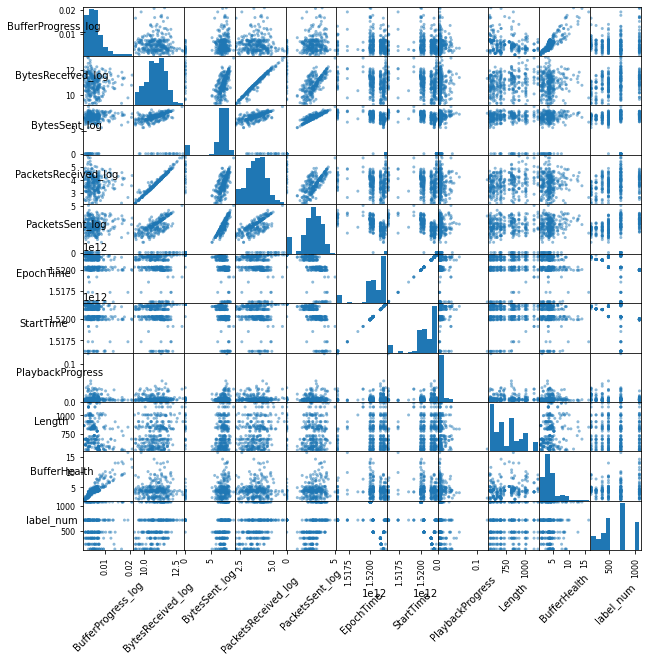

In [ ]:
sm = scatter_matrix(df_cleaned[columns_to_plot_after_transf],
                   figsize=(10,10))
visualization.rotate_labels(sm)

plt.show()

Let's check the most correlated features to `label_num`.

In [ ]:
feature_engineering.get_features_correlated_to_target(df_cleaned,
                                    target_feature='label_num').head(10)

label_num              1.00
StartTime             -0.41
EpochTime             -0.41
PacketsSent            0.38
PacketsSent0           0.36
PacketsReceived_log    0.34
KBytesReceived_log     0.34
BytesReceived_log      0.34
BytesSent0             0.30
PacketsSent_log        0.26
Name: label_num, dtype: float64

Before adding the transformed features, the most correlated features were

In [ ]:
features_corr.head(10)

label_num          1.00
StartTime         -0.41
EpochTime         -0.41
PacketsSent        0.38
PacketsSent0       0.36
BytesSent0         0.30
BytesReceived      0.26
KBytesReceived     0.26
PacketsReceived    0.25
BytesSent3        -0.23
Name: label_num, dtype: float64

We have unveiled more correlation in our data than it was before. It will be very useful to produce better models

### Which transformation?

There are many possible transformation you could use: see [here](https://medium.com/@TheDataGyan/day-8-data-transformation-skewness-normalization-and-much-more-4c144d370e55) and [here](https://medium.com/@ODSC/transforming-skewed-data-for-machine-learning-90e6cc364b0) . How would we choose?

* Visual inspection: you plot a variable vs. another and you apply some rules of thumb
   * If the values of a certain feature concentrate a lot on low values, apply `log`
   * In general, youy can plot a feature vs. the target label, and if you recognize the shape of a well-known function, apply the corresponding transformation. The well-known functions in the following figure capture in a quite complete way the kinds of dependence you may find between a feature and the target. But, you have no limits, you can choose a non-linear transformation based on your fantasy, your intuition and your experience.

   ![alt text](https://miro.medium.com/max/1262/1*iEbD3x2S5KOiEI6ZOltp9w.png)

          Picture from randerson112358's [post](https://medium.com/@randerson112358/algorithm-analysis-time-complexity-simplified-cd39a81fec71) on medium.com

* Another alternative: you train a model capable of catpure non-linearities (polynomial regression, linear network, random forests) and you let it transform the features automatically, for you.
* Use [Generalized Additive Models](https://youtu.be/f9Rj6SHPHUU) (outside our scope): they are able to choose the right transformation within a family of possible transformations.

# References

[1] Gutterman, C., Guo, K., Arora, S., Wang, X., Wu, L., Katz-Bassett, E., & Zussman, G. (2019). Requet: Real-time QoE detection for encrypted YouTube traffic. In ACM MMSys.

In [ ]:
df_cleaned.to_csv('df.A_2.csv',index = None, header=True)